In [2]:
#import essentials
import pandas as pd
import numpy as np

from analysis_preprocess import checkcorrelation, checkmissing, checkallcatvaluecounts, PrincipalComponentAnalysis, MultipleCorrespondenceAnalysis, outliersearch, groupratings


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

data = pd.read_csv('train.csv')

# EDA(Exploratory Data Analysis)

In [3]:
    print(data.info())
    print("=====================================")
    print("Number of rows:")
    print(len(data))
    print("=====================================")
    print("Number if unique id:")
    print(data['Id'].nunique())
    print("=====================================")
    print("Number of unique houses:")
    print(len(data.drop(['Id','SalePrice','SaleCondition','SaleType'],axis = 1).drop_duplicates()))
    print("=====================================")
    print(data.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

All of the records are unique despite dropping SalePrice, SaleCondition, and SaleType to specifically look at the characteristics of the house. 

This means, no house is the same with one and another.

From the .info(), we notice that some attributes have very large missing values. To understand the intuition behind these missing values, we need to separate them first by the data types (e.g., numeric vs categorical) to ease our work

In [4]:
#Before continuing, drop "Id" since it is an irrelevant column
data.drop(columns = ['Id'],inplace = True)

# Exploring Numerical Variables (and categorical variables along the way)

We need to see the missing values present in the numeric variables

In [5]:
numofmv = data.select_dtypes(exclude = 'object').isnull().sum()/len(data)
print('Columns that has missing values:\n{}'.format(numofmv[numofmv>0]))

#print('Columns that has large missing values:\n{}'.format(numofmv[numofmv>0.3].sort_values(ascending=False)))

Columns that has missing values:
LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64


it seems that there are 3 numerical variables that has missing values.

#### Checking lotfrontage

In [6]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [7]:
#on what conditions does lotfrontage has missing value
data[data['LotFrontage'].isna()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7             60       RL          NaN    10382   Pave   NaN      IR1   
12            20       RL          NaN    12968   Pave   NaN      IR2   
14            20       RL          NaN    10920   Pave   NaN      IR1   
16            20       RL          NaN    11241   Pave   NaN      IR1   
24            20       RL          NaN     8246   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1429          20       RL          NaN    12546   Pave   NaN      IR1   
1431         120       RL          NaN     4928   Pave   NaN      IR1   
1441         120       RM          NaN     4426   Pave   NaN      Reg   
1443          30       RL          NaN     8854   Pave   NaN      Reg   
1446          20       RL          NaN    26142   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
7            Lvl    AllPub    Corner  ...        0    NaN    NaN        Shed   
12           Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
14           Lvl    AllPub    Corner  ...        0    NaN   GdWo         NaN   
16           Lvl    AllPub   CulDSac  ...        0    NaN    NaN        Shed   
24           Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1429         Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
1431         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1441         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1443         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1446         Lvl    AllPub   CulDSac  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
7        350     11    2009        WD         Normal     200000  
12         0      9    2008        WD         Normal     144000  
14         0      5    2008        WD         Normal     157000  
16       700      3    2010        WD         Normal     149000  
24         0      5    2010        WD         Normal     154000  
...      ...    ...     ...       ...            ...        ...  
1429       0      4    2007        WD         Normal     182900  
1431       0     10    2009        WD         Normal     143750  
1441       0      5    2008        WD         Normal     149300  
1443       0      5    2009        WD         Normal     121000  
1446       0      4    2010        WD         Normal     157900  

[259 rows x 80 columns]

In [8]:
#anything in common when LotFrontage is NA?
commonfeature = data[data['LotFrontage'].isna()].nunique()
commonfeature[commonfeature == 1]

PoolQC    1
dtype: int64

In [9]:
data[data['LotFrontage'].isna()][['LotFrontage','PoolQC','PoolArea']]

LotFrontage PoolQC  PoolArea
7             NaN    NaN         0
12            NaN    NaN         0
14            NaN    NaN         0
16            NaN    NaN         0
24            NaN    NaN         0
...           ...    ...       ...
1429          NaN    NaN         0
1431          NaN    NaN         0
1441          NaN    NaN         0
1443          NaN    NaN         0
1446          NaN    NaN         0

[259 rows x 3 columns]

In [10]:
data['Neighborhood'].isnull().sum()

0

It shows that only value from "PoolQC" feature is static when LotFrontage is missing. PoolQC is NaN when there is no pool in the house. But, it does not make sense because the availability of the pool does not affect distance from street. It's not possible to drop these values since in the future we might encounter these missing values again. 

Since we have data about the style of the house of the area that the house is located, we can try to fill the missing values by the neigborhood median. This intuition is driven by the condition of the landscape of each neighborhood. For example, depending on the landscape, houses in 강남 versus houses in 청량리 will have a difference of "house to street" distance. Part of it is due to the neighborhood landscape, condition, etc.

In [11]:
LFneighborhood = data.groupby('Neighborhood')['LotFrontage'].median().to_dict()
data['LotFrontage'] = data.apply(lambda row: LFneighborhood[row['Neighborhood']] if np.isnan(row['LotFrontage']) else row['LotFrontage'], axis=1)

In [12]:
#Since the other distance metric is square feet, let's try to convert this for the sake of scaling
data['LotFrontage'] = data['LotFrontage']**2

#### Checking MasVnrArea

MasVnrArea is directly dependent with MasVnrType. Could it be that missing MasVnrArea means no masonry veneer available?

In [13]:
print("Does empty MasVnrArea means no masonry veneer available?")
display(data[data['MasVnrArea'].isna()][['MasVnrArea','MasVnrType']])
print("number of empty space but type is not None: {}".format(len(data[data['MasVnrArea'].isna()][['MasVnrArea','MasVnrType']])))
print("Does empty MasVnrType means no space reserved for masonry veneer?")
display(data[(data['MasVnrType'].isna()) & (data['MasVnrArea'] > 0)][['MasVnrType','MasVnrArea']])
print("number of empty type but has space: {}".format(len(data[(data['MasVnrType'].isna()) & (data['MasVnrArea'] > 0)][['MasVnrType','MasVnrArea']])))

Does empty MasVnrArea means no masonry veneer available?


MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
650          NaN        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1243         NaN        NaN
1278         NaN        NaN

number of empty space but type is not None: 8
Does empty MasVnrType means no space reserved for masonry veneer?


MasVnrType  MasVnrArea
624         NaN       288.0
773         NaN         1.0
1230        NaN         1.0
1300        NaN       344.0
1334        NaN       312.0

number of empty type but has space: 5


The first statement shows that when the Area is not available, there's a tendency that the type is also not known. As for the other way around, in my opinion we can also try to impute it with the mode of the data.

In [14]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data.loc[(data['MasVnrType'].isna()) & (data['MasVnrArea'] > 0), 'MasVnrType'] = data['MasVnrType'].mode()[0]
data['MasVnrType'] = data['MasVnrType'].fillna("None")

In [15]:
#sanity check
data.loc[(data['MasVnrType'] == 'None') & (data['MasVnrArea'] > 0), 'MasVnrType'] 

Series([], Name: MasVnrType, dtype: object)

#### Checking GarageYrBlt    

GarageYrBlt is directly associated with the availability of the garage. Let's check that first

In [16]:
print('Check Data')
print('The length of data when GarageYrBlt is empty = the length of data when both GarageYrBlt and GarageType are empty:')
EmptyGarageYear = len(data[data['GarageYrBlt'].isna()][['GarageYrBlt','GarageType']])
EmptyGarageYear_GarageType = len(data[(data['GarageYrBlt'].isna())&(data['GarageType'].isna())][['GarageYrBlt','GarageType']])
print(EmptyGarageYear == EmptyGarageYear_GarageType)

Check Data
The length of data when GarageYrBlt is empty = the length of data when both GarageYrBlt and GarageType are empty:
True


It seems that GarageYear is only not available when there is no Garage. Let's impute this with zero.

In [17]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

#### Additional note on MSSubClass

If we observe MSSubClass, it is more similar to categorical variable than numerical variable. Convert this into str and then to object type.

In [18]:
data['MSSubClass'] = data['MSSubClass'].astype('str').astype('object')

#### Correlation and Engineering

I do feature engineering referring to the reference that Ineeji gave to me.

In [19]:
####in this phase will do engineering for numerical variables

#add more weight if the building has been remodel, especially if it's recently remodeled
data['YrBltAndRemod']=data['YearBuilt']+data['YearRemodAdd']

#captures the feeling of spaciness in the house
data['TotalSF']=data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['Total_sqr_footage'] = (data['BsmtFinSF1'] + data['BsmtFinSF2'] +
                                 data['1stFlrSF'] + data['2ndFlrSF'])
data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] +
                              data['EnclosedPorch'] + data['ScreenPorch'] +
                              data['WoodDeckSF'])
data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) +
                               data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))



#### About Ratings

When people fill out ratings, usually there is bias in the value. For example, if a person give out a rating 2 out of 10, that value could be equal to someone else's 4 out of 10. Thus, investigate and check first about the distribution.

=======Distribution of Overall Quality=======


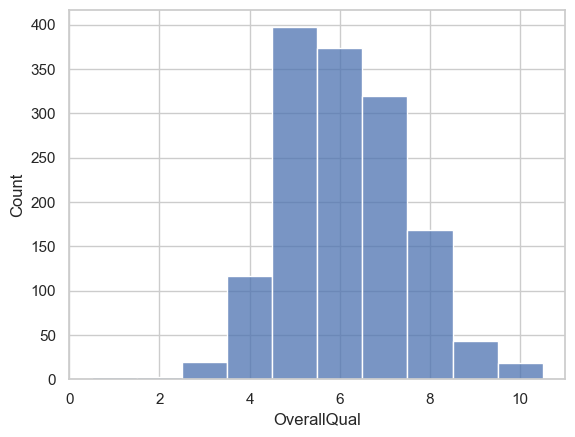

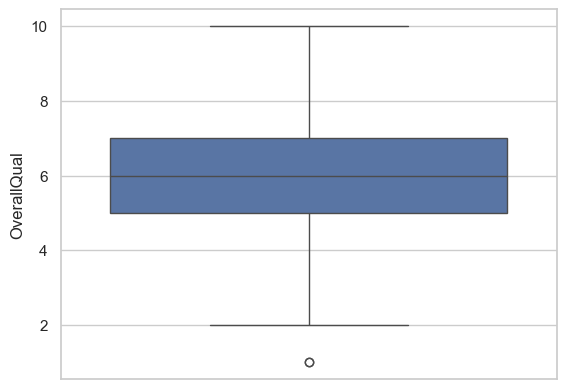

=======Distribution of Overall Cond=======


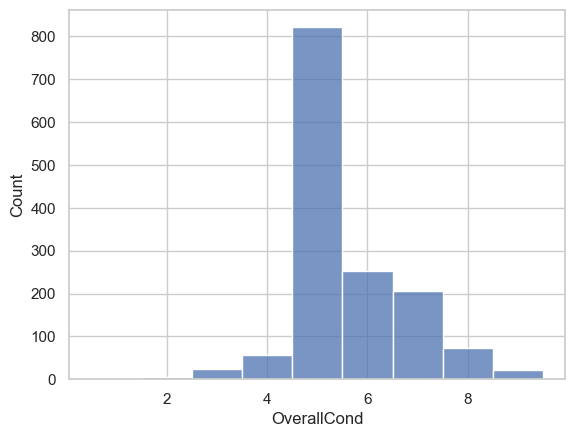

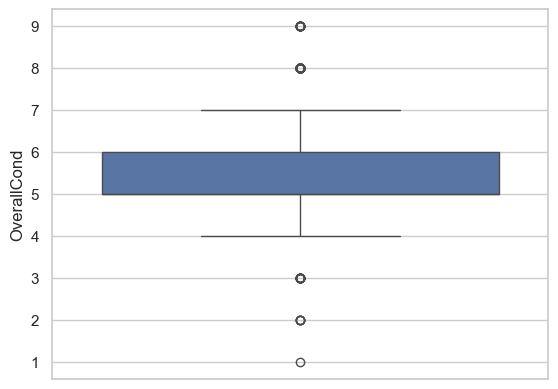

In [20]:
print('='*7+'Distribution of Overall Quality'+'='*7)
sns.histplot(data['OverallQual'], discrete = True, shrink = 1)
plt.show()

sns.boxplot(data['OverallQual'])
plt.show()

print('='*7+'Distribution of Overall Cond'+'='*7)
sns.histplot(data['OverallCond'], discrete = True, shrink = 1)
plt.show()

sns.boxplot(data['OverallCond'])
plt.show()

In [21]:
#because of this, do IQR grouping
data['OverallQual'] = data['OverallQual'].apply(lambda x: groupratings(x, 5, 8)).astype('object')
data['OverallCond'] = data['OverallCond'].apply(lambda x: groupratings(x, 5, 7)).astype('object')

In [22]:
checkallcatvaluecounts(data[['OverallQual','OverallCond']])

OverallQual
Normal    0.861644
Low       0.096575
High      0.041781
Name: proportion, dtype: float64
OverallCond
Normal    0.875342
High      0.064384
Low       0.060274
Name: proportion, dtype: float64


#### About Garage Cars & Garage Area

Usually, when people buy house, they want to know how spacy is the garage but the purpose they want to know it is because they want to know how many cars can fit into their garage. Also, by knowing how many cars fit, we can have a sense of the garage area.

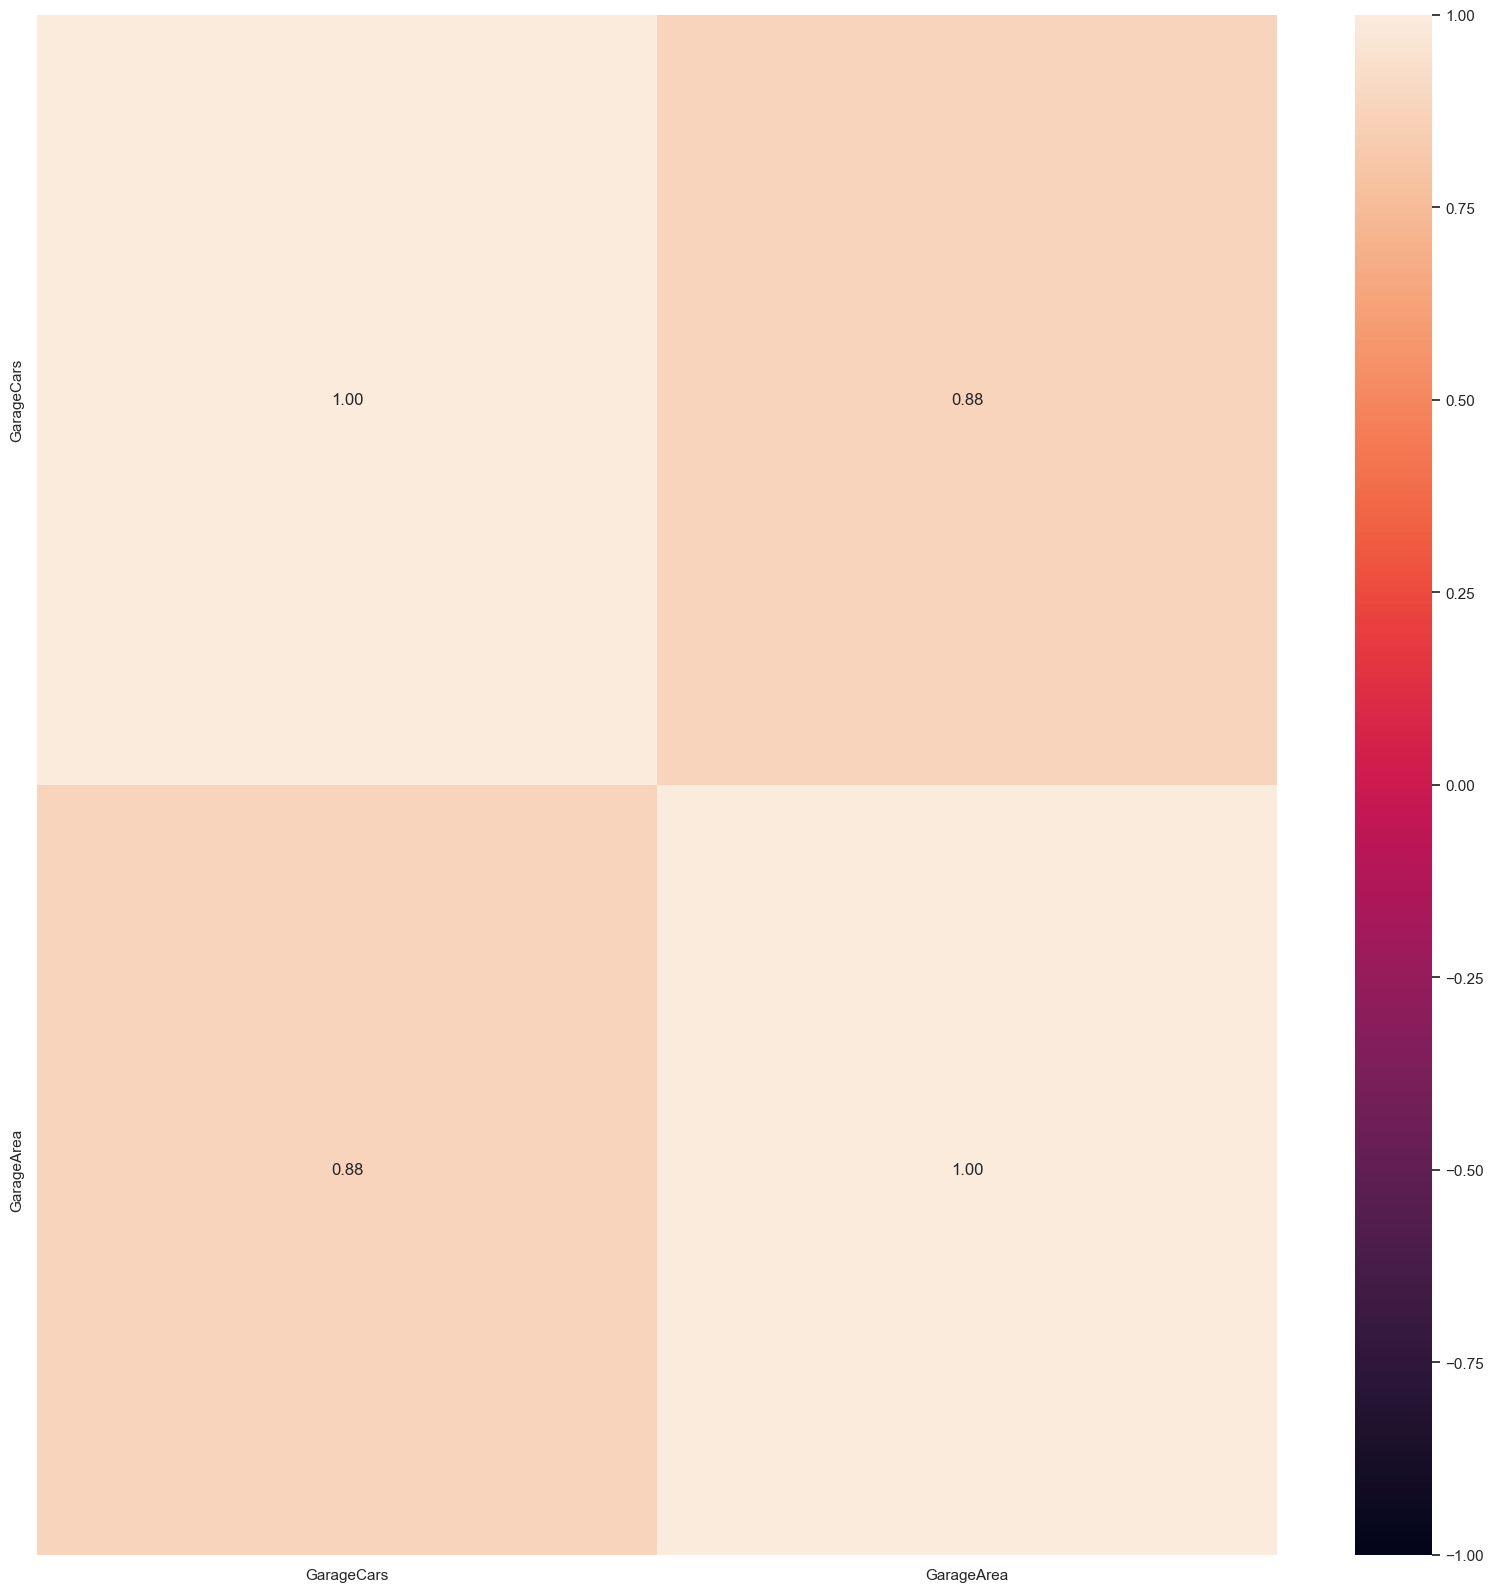

In [23]:
#proof by correlation
checkcorrelation(data[['GarageCars','GarageArea']])

In [24]:
#Thus, we can drop GarageArea
data.drop(columns = ['GarageArea'],inplace = True)

#### About Correlation

In [25]:
data.select_dtypes(exclude = 'object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LotFrontage        1460 non-null   float64
 1   LotArea            1460 non-null   int64  
 2   YearBuilt          1460 non-null   int64  
 3   YearRemodAdd       1460 non-null   int64  
 4   MasVnrArea         1460 non-null   float64
 5   BsmtFinSF1         1460 non-null   int64  
 6   BsmtFinSF2         1460 non-null   int64  
 7   BsmtUnfSF          1460 non-null   int64  
 8   TotalBsmtSF        1460 non-null   int64  
 9   1stFlrSF           1460 non-null   int64  
 10  2ndFlrSF           1460 non-null   int64  
 11  LowQualFinSF       1460 non-null   int64  
 12  GrLivArea          1460 non-null   int64  
 13  BsmtFullBath       1460 non-null   int64  
 14  BsmtHalfBath       1460 non-null   int64  
 15  FullBath           1460 non-null   int64  
 16  HalfBath           1460 

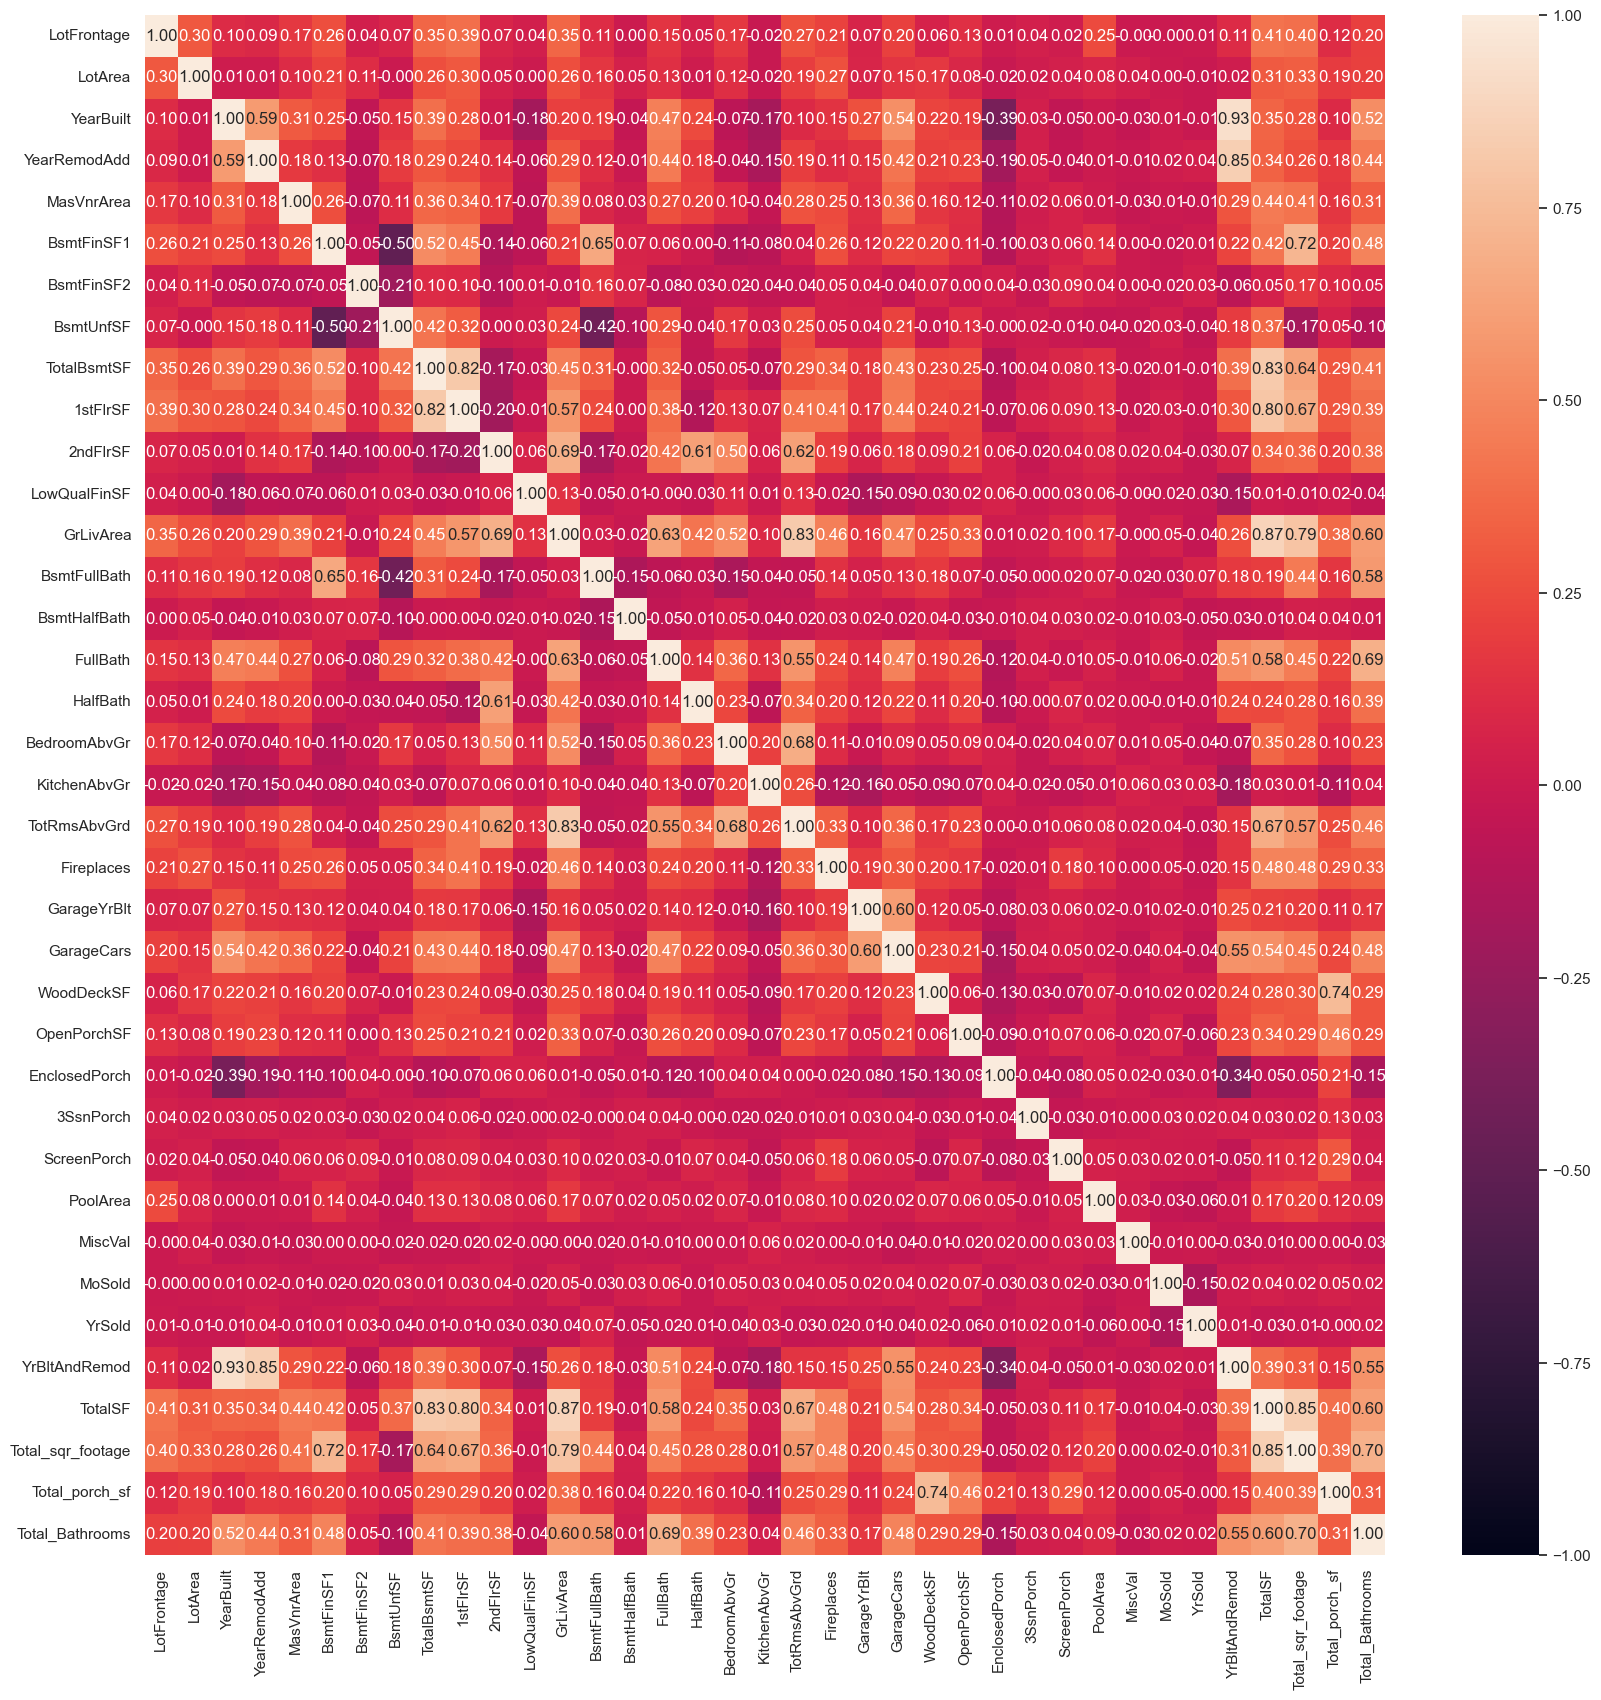

In [26]:
#Check for correlations
checkcorrelation(data.select_dtypes(exclude = 'object').drop("SalePrice",axis = 1))

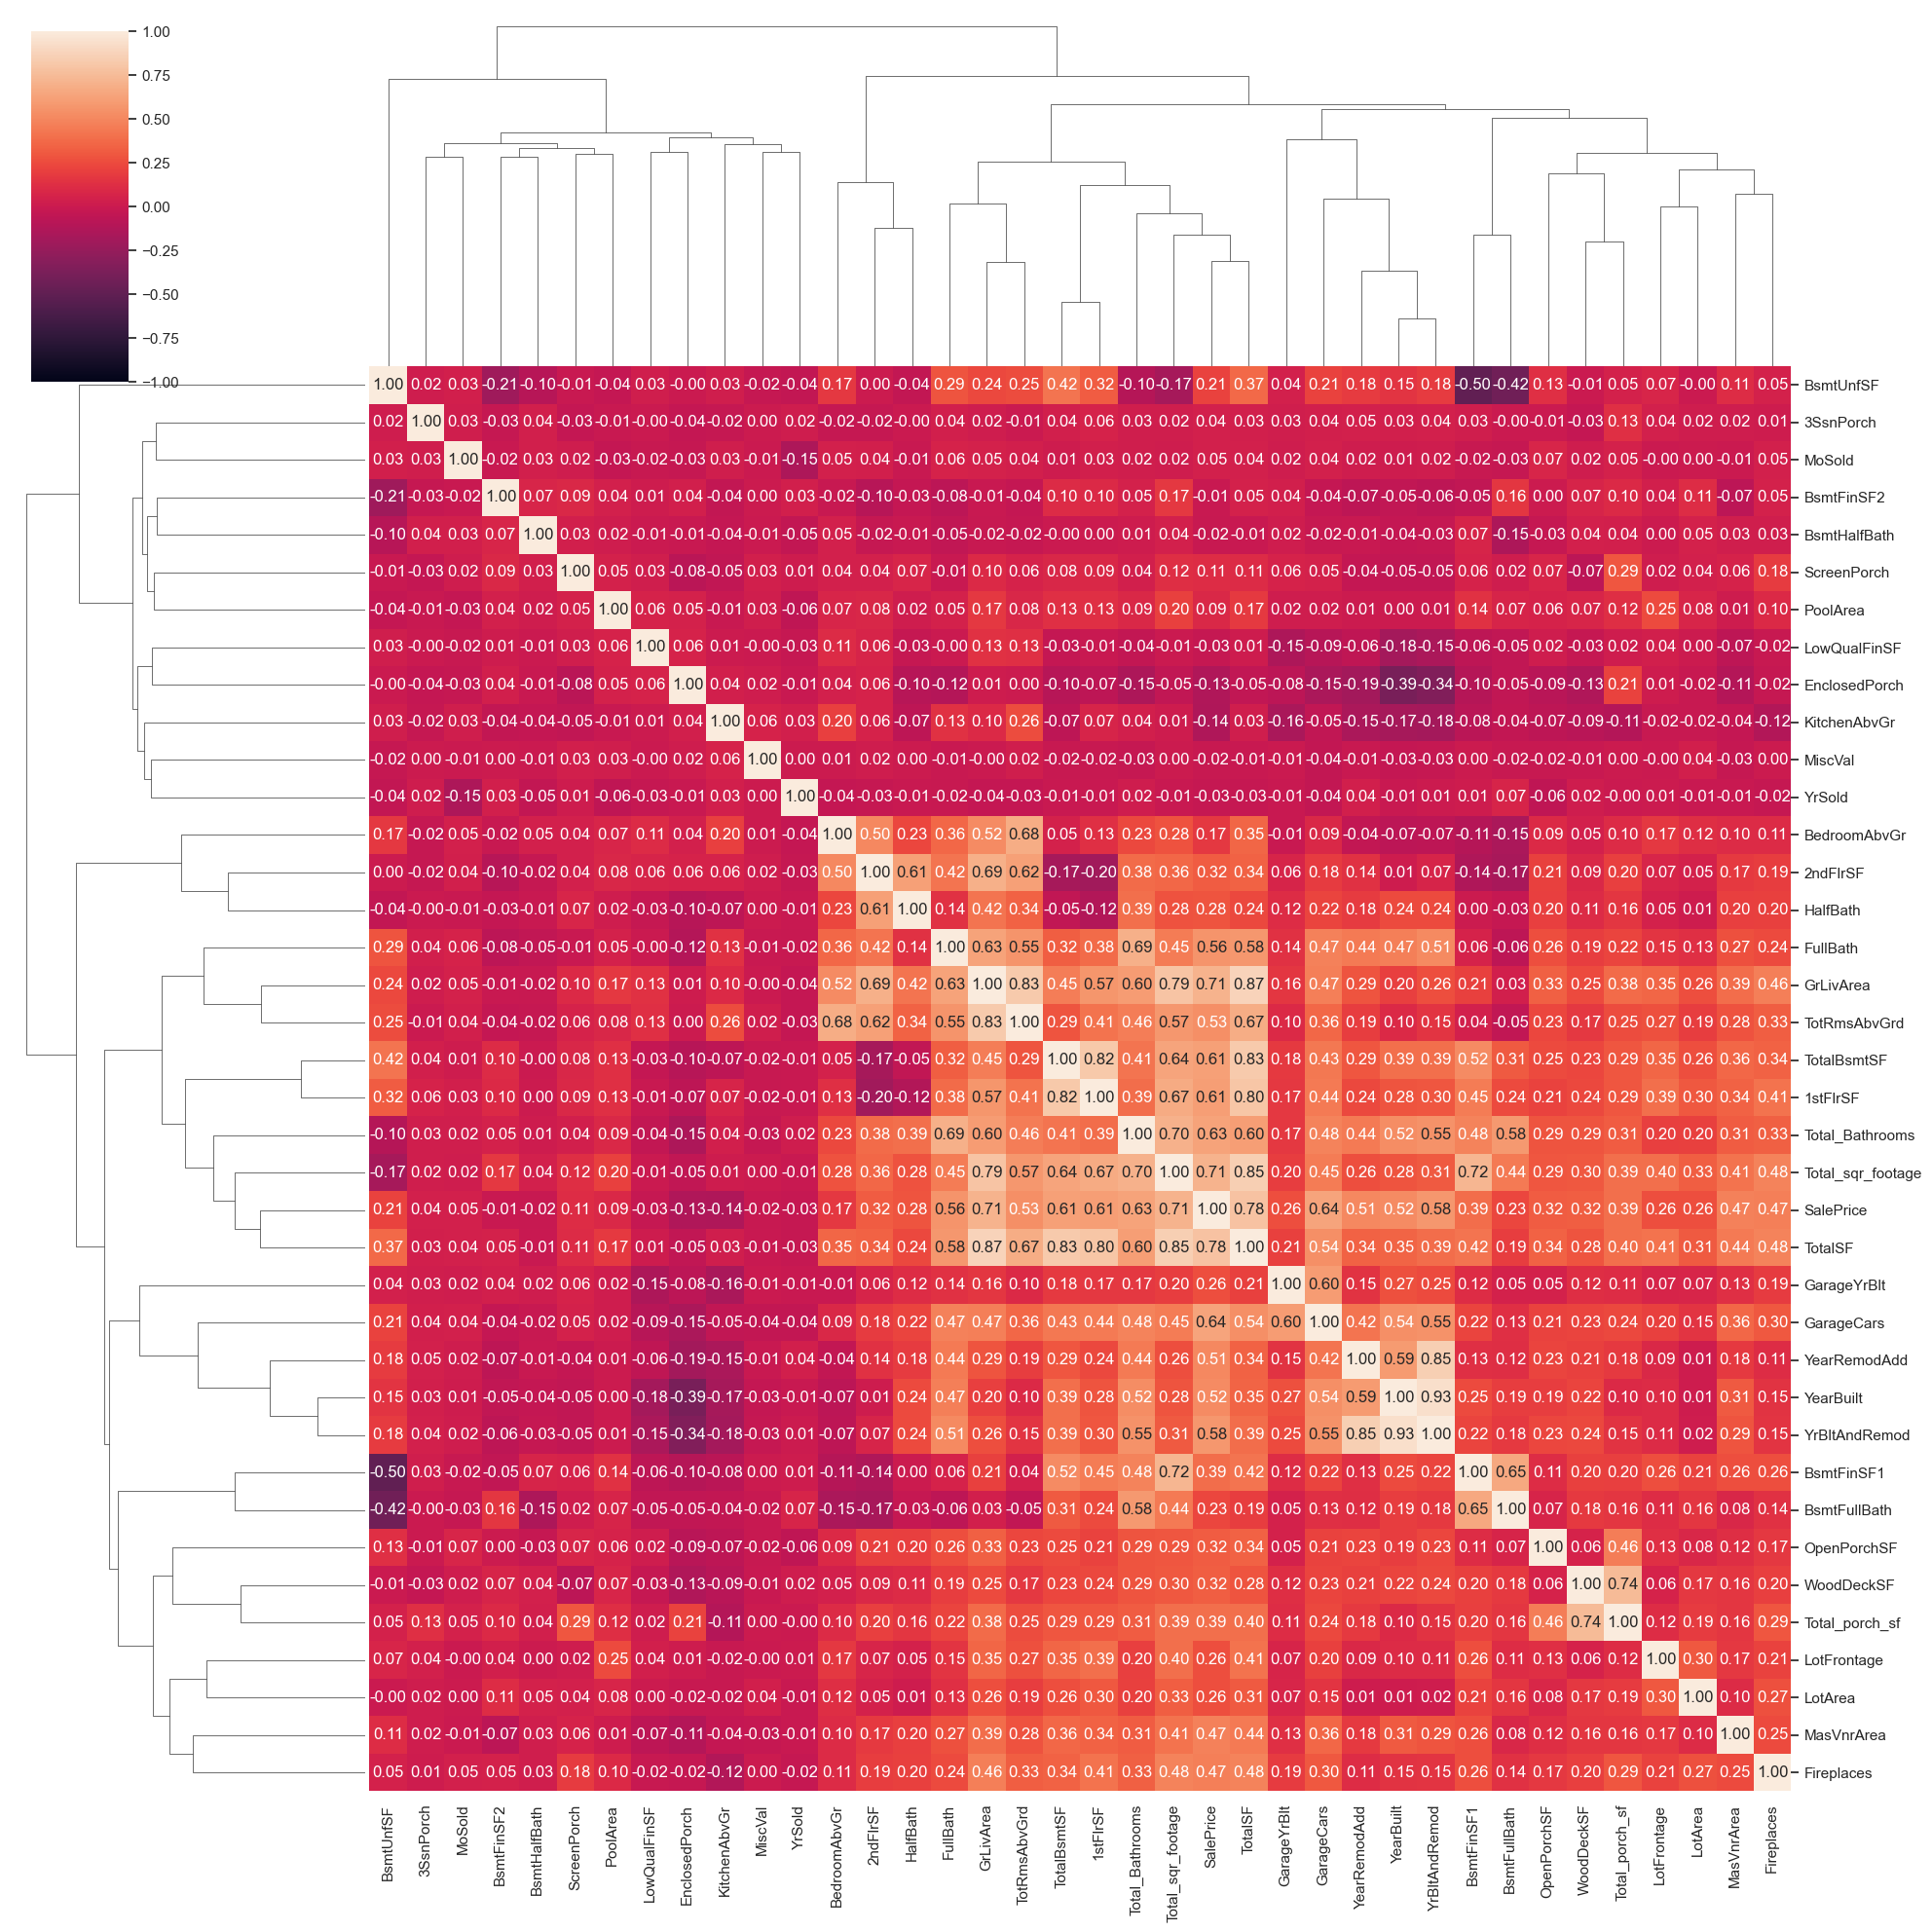

In [27]:
checkcorrelation(data.select_dtypes(exclude = 'object'), cluster = True)

In [28]:
checkcorrelation(data.select_dtypes(exclude = 'object'), target='SalePrice')

                   SalePrice
SalePrice           1.000000
TotalSF             0.782260
GrLivArea           0.708624
Total_sqr_footage   0.708047
GarageCars          0.640409
Total_Bathrooms     0.631731
TotalBsmtSF         0.613581
1stFlrSF            0.605852
YrBltAndRemod       0.576144
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
MasVnrArea          0.472614
Fireplaces          0.466929
Total_porch_sf      0.390993
BsmtFinSF1          0.386420
WoodDeckSF          0.324413
2ndFlrSF            0.319334
OpenPorchSF         0.315856
HalfBath            0.284108
LotArea             0.263843
GarageYrBlt         0.261366
LotFrontage         0.259778
BsmtFullBath        0.227122
BsmtUnfSF           0.214479
BedroomAbvGr        0.168213
ScreenPorch         0.111447
PoolArea            0.092404
MoSold              0.046432
3SsnPorch           0.044584
BsmtFinSF2         -0.011378
BsmtHalfBath       -0.016844
MiscVal       

We see from correlation analysis that a lot of the numerical features are correlated. With this in mind, we can do PCA for numerical variables

#### PCA for numerical variables

[0.22902808 0.31569065 0.39000917 0.44723849 0.49173255 0.52815147
 0.56003276 0.59142879 0.6215805  0.65109267 0.67962984 0.70749885
 0.73460208 0.76000364 0.78473905 0.8091171  0.831604   0.85353984
 0.8744505  0.89303274 0.91078192 0.92731864 0.94269089 0.95577981
 0.9675623  0.97760029 0.98474536 0.99088385 0.99622338 1.
 1.         1.         1.         1.         1.         1.
 1.        ]


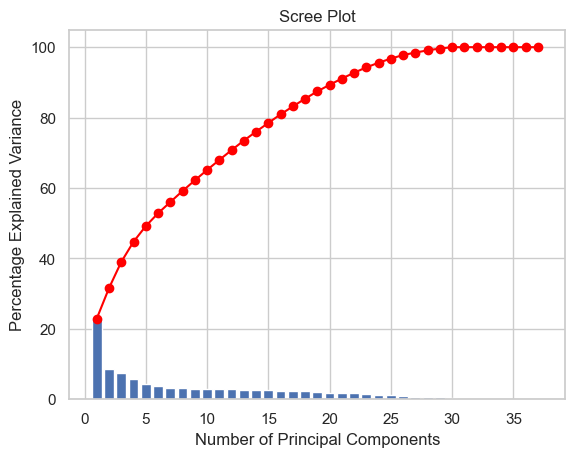

Number of Principal Components that explains 85% of variance:
18
Loadings:
                       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6  \
LotFrontage        0.140551  0.016095  0.168986  0.139538 -0.098624 -0.117863   
LotArea            0.112894  0.000359  0.207003  0.060248  0.036581 -0.101970   
YearBuilt          0.190116 -0.256388 -0.330849 -0.041223 -0.053125  0.011355   
YearRemodAdd       0.175324 -0.153177 -0.312616 -0.039616  0.017342  0.193472   
MasVnrArea         0.170839 -0.022741 -0.031501  0.029825 -0.043360 -0.178789   
BsmtFinSF1         0.163671 -0.285253  0.291147 -0.157882 -0.180235 -0.030533   
BsmtFinSF2         0.010500 -0.056524  0.184240 -0.050858  0.116042 -0.022587   
BsmtUnfSF          0.068589  0.151467 -0.249367  0.512004  0.124056  0.065473   
TotalBsmtSF        0.243105 -0.164789  0.119274  0.332851 -0.019760  0.025896   
1stFlrSF           0.243342 -0.098333  0.168826  0.354797 -0.056657  0.026639   
2ndFlrSF           0.134127  0.381

In [29]:
PCA = PrincipalComponentAnalysis()
PCA.explain(data.select_dtypes(exclude='object').drop(columns=['SalePrice']))

In [30]:
data.select_dtypes(exclude='object').drop(columns = ['SalePrice']).shape[1]

37

With this, we can reduce the numeric variables from 37 variables to just 18

In [31]:
#This is for preprocessing later
#numeric = PCA.do(data.select_dtypes(exclude='object').drop(columns=['SalePrice']), n_components = 20, mode = 'train')
#numericcol = data.select_dtypes(exclude='object').drop(columns = ['SalePrice']).columns
#data = data.drop(columns = numericcol)
#data = pd.concat([data,numeric],axis = 1)
#data.info()

# Handling Categorical Variables

There are a lot of variables here that are categorical. Since there is a lot of them, first we can try to see which variables have a high missing value count. After that, we can try to remove variables that are greatly imbalanced since it will not help much during model inference due to lack of variance. Third, if the number of variables are still huge, we can reduce them using MCA.

First, select variables that are not considered in numerical data

In [32]:
data.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          91 non-null     object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   object
 15  OverallCond    1460 non-null   object
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-null

In [33]:
checkmissing(data.select_dtypes(include=['object']), threshold = 0.3)

Columns that has missing values:
Alley           0.937671
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64
Columns that has large missing values:
PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
dtype: float64


Immediately dropped (PoolQC, MiscFeature, Alley, Fence). Because even if we have them imputed, most of the value will be the same. They do not give much information.

In [34]:
data.drop(columns = ['PoolQC','MiscFeature','Alley','Fence'], axis = 1, inplace = True)

#### Categorical variables with high cardinality

Generally, categorical variables with high cardinality are dropped. Here, I don't dropped it because eventually we will use MCA.

##### About HouseStyle

HouseStyle has categories that we can reduce even though cardinality of a nominal categorical feature is not a problem for MCA

In [ ]:
data['HouseStyle'] = data['HouseStyle'].apply(lambda x: '1.5f' if x == '1.5Fin' or x == '1.5Unf' else x)
data['HouseStyle'] = data['HouseStyle'].apply(lambda x: '2.5f' if x == '2.5Fin' or x == '2.5Unf' else x)

#### Evaluate count on variables left

In [35]:
checkallcatvaluecounts(data.select_dtypes(include=['object']))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name:

#### dropped imbalanced categorical columns

Variables that are highly imbalanced are Street, Utilities, LandSlope, Condition2, RoofMatl, BsmtCond, Heating, CentralAir, Electrical, Functional, GarageQual, GarageCond, and PavedDrive.

In [36]:
imbalancedcatcol = ['Street','Utilities','LandSlope','Condition2','RoofMatl','BsmtCond','Heating',
                    'CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive']
data.drop(columns = imbalancedcatcol, inplace = True)

In [37]:
#check missing again
data.select_dtypes(include=['object']).info()
checkmissing(data.select_dtypes(include=['object']), threshold = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   LotConfig      1460 non-null   object
 5   Neighborhood   1460 non-null   object
 6   Condition1     1460 non-null   object
 7   BldgType       1460 non-null   object
 8   HouseStyle     1460 non-null   object
 9   OverallQual    1460 non-null   object
 10  OverallCond    1460 non-null   object
 11  RoofStyle      1460 non-null   object
 12  Exterior1st    1460 non-null   object
 13  Exterior2nd    1460 non-null   object
 14  MasVnrType     1460 non-null   object
 15  ExterQual      1460 non-null   object
 16  ExterCond      1460 non-null   object
 17  Foundation     1460 non-null   object
 18  BsmtQual       1423 non-null

## Now, focus on evaluating missing values in categorical

#### BsmtQual & BsmtExposure

In [38]:
checkmissing(data.select_dtypes(include=['object'])[['BsmtQual','BsmtExposure']], threshold = 0)

Columns that has missing values:
BsmtQual        0.025342
BsmtExposure    0.026027
dtype: float64


For these two, it's weird that the number of missing is not the same. Thus, it cannot be solely due to misinterpreted "None"

In [39]:
data[data['BsmtQual'].isna()][['BsmtFinSF1','BsmtUnfSF']]

BsmtFinSF1  BsmtUnfSF
17             0          0
39             0          0
90             0          0
102            0          0
156            0          0
182            0          0
259            0          0
342            0          0
362            0          0
371            0          0
392            0          0
520            0          0
532            0          0
533            0          0
553            0          0
646            0          0
705            0          0
736            0          0
749            0          0
778            0          0
868            0          0
894            0          0
897            0          0
984            0          0
1000           0          0
1011           0          0
1035           0          0
1045           0          0
1048           0          0
1049           0          0
1090           0          0
1179           0          0
1216           0          0
1218           0          0
1232           0          0
1321           0          0
1412           0          0

In [40]:
data[data['BsmtExposure'].isna()][['BsmtFinSF1','BsmtUnfSF']]

BsmtFinSF1  BsmtUnfSF
17             0          0
39             0          0
90             0          0
102            0          0
156            0          0
182            0          0
259            0          0
342            0          0
362            0          0
371            0          0
392            0          0
520            0          0
532            0          0
533            0          0
553            0          0
646            0          0
705            0          0
736            0          0
749            0          0
778            0          0
868            0          0
894            0          0
897            0          0
948            0        936
984            0          0
1000           0          0
1011           0          0
1035           0          0
1045           0          0
1048           0          0
1049           0          0
1090           0          0
1179           0          0
1216           0          0
1218           0          0
1232           0          0
1321           0          0
1412           0          0

Above shows that the problem is on mismatch between the two variables, not the existing of the basements. Also, it shows that when the BsmtQual & BsmtExposure are NaN, most of the time there really is no basement. If so, we can fill them with no Basement.

In [41]:
data['BsmtQual'].fillna('NA', inplace = True)
data['BsmtExposure'].fillna('NA',inplace = True)

C:\Windows\Temp\ipykernel_3260\1277386514.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BsmtQual'].fillna('NA', inplace = True)
C:\Windows\Temp\ipykernel_3260\1277386514.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

Since index 948 is a bit conflicting, we can drop this one row

In [42]:
data = data.drop(index = 948).reset_index(drop = True)

#### BsmtFinType1 & BsmtFinType2

We just dropped a row previously. Let's recheck the missing values

In [43]:
checkmissing(data.select_dtypes(include=['object']), threshold = 0)

Columns that has missing values:
BsmtFinType1    0.025360
BsmtFinType2    0.026045
FireplaceQu     0.472927
GarageType      0.055517
GarageFinish    0.055517
dtype: float64


We need to check this like we check BsmtQual and BsmtExposure previously

In [44]:
data[data['BsmtFinType1'].isna()][['BsmtFinSF1','BsmtUnfSF']]

BsmtFinSF1  BsmtUnfSF
17             0          0
39             0          0
90             0          0
102            0          0
156            0          0
182            0          0
259            0          0
342            0          0
362            0          0
371            0          0
392            0          0
520            0          0
532            0          0
533            0          0
553            0          0
646            0          0
705            0          0
736            0          0
749            0          0
778            0          0
868            0          0
894            0          0
897            0          0
983            0          0
999            0          0
1010           0          0
1034           0          0
1044           0          0
1047           0          0
1048           0          0
1089           0          0
1178           0          0
1215           0          0
1217           0          0
1231           0          0
1320           0          0
1411           0          0

In [45]:
data[data['BsmtFinType2'].isna()][['BsmtFinSF2','BsmtUnfSF']]

BsmtFinSF2  BsmtUnfSF
17             0          0
39             0          0
90             0          0
102            0          0
156            0          0
182            0          0
259            0          0
332          479       1603
342            0          0
362            0          0
371            0          0
392            0          0
520            0          0
532            0          0
533            0          0
553            0          0
646            0          0
705            0          0
736            0          0
749            0          0
778            0          0
868            0          0
894            0          0
897            0          0
983            0          0
999            0          0
1010           0          0
1034           0          0
1044           0          0
1047           0          0
1048           0          0
1089           0          0
1178           0          0
1215           0          0
1217           0          0
1231           0          0
1320           0          0
1411           0          0

In [46]:
data[['BsmtFinType1','BsmtFinType2']] = data[['BsmtFinType1','BsmtFinType2']].fillna('NA')

#### FireplaceQu

In [47]:
data[data['FireplaceQu'].isna()][['FireplaceQu','Fireplaces']]

FireplaceQu  Fireplaces
0            NaN           0
5            NaN           0
10           NaN           0
12           NaN           0
15           NaN           0
...          ...         ...
1451         NaN           0
1452         NaN           0
1453         NaN           0
1457         NaN           0
1458         NaN           0

[690 rows x 2 columns]

In [48]:
data[(data['FireplaceQu'].isna()) & (data['Fireplaces'] > 0)][['FireplaceQu','Fireplaces']]

Empty DataFrame
Columns: [FireplaceQu, Fireplaces]
Index: []

In [49]:
data['FireplaceQu'].fillna('NA', inplace = True)

C:\Windows\Temp\ipykernel_3260\871519053.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FireplaceQu'].fillna('NA', inplace = True)


#### GarageType & GarageFinish

In [50]:
print(len(data[data['GarageYrBlt'] == 0]))
print(data['GarageType'].isna().sum())
print(data['GarageFinish'].isna().sum())

81
81
81


In [51]:
data['GarageType'].fillna('NA', inplace = True)
data['GarageFinish'].fillna('NA',inplace = True)

C:\Windows\Temp\ipykernel_3260\701484985.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GarageType'].fillna('NA', inplace = True)
C:\Windows\Temp\ipykernel_3260\701484985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

#### Feature Engineering & Reduction (With MCA)

First, do feature engineering following reference.

In [52]:
### In this phase, do feature engineering for categorical columns

data['haspool'] = data['PoolArea'].apply(lambda i: "Yes" if i > 0 else "No")
data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda i: "Yes" if i > 0 else "No")
data['hasgarage'] = data['GarageCars'].apply(lambda i: "Yes" if i > 0 else "No")
data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda i: "Yes" if i > 0 else "No")
data['hasfireplace'] = data['Fireplaces'].apply(lambda i: "Yes" if i > 0 else "No")

#My feature engineering
data['multiplecarspace'] = data['GarageCars'].apply(lambda i: "Yes" if i > 1 else "No")

In [53]:
#Recheck whether the engineered variables are imbalanced or not
checkallcatvaluecounts(data[['haspool','has2ndfloor','hasgarage','hasbsmt','hasfireplace','multiplecarspace']])

haspool
No     0.995202
Yes    0.004798
Name: proportion, dtype: float64
has2ndfloor
No     0.568197
Yes    0.431803
Name: proportion, dtype: float64
hasgarage
Yes    0.944483
No     0.055517
Name: proportion, dtype: float64
hasbsmt
Yes    0.97464
No     0.02536
Name: proportion, dtype: float64
hasfireplace
Yes    0.527073
No     0.472927
Name: proportion, dtype: float64
multiplecarspace
Yes    0.69157
No     0.30843
Name: proportion, dtype: float64
houseforfamily
Yes    0.961618
No     0.038382
Name: proportion, dtype: float64


In [54]:
#delete haspool, hasgarage, hasbsmt
data.drop(columns = ['haspool','hasgarage','hasbsmt'],inplace = True)

#### MCA for categorical variables

One of MCA assumption is that the variables must have more than two categories within. Thus, first set aside the categories that we don't pay attention to.

In [55]:
data['has2ndfloor'] = data['has2ndfloor'].astype('object')
data['hasfireplace'] = data['hasfireplace'].astype('object')
data['multiplecarspace'] = data['multiplecarspace'].astype('object')

In [56]:
checkallcatvaluecounts(data.select_dtypes(include=['object']))

MSSubClass
20     0.367375
60     0.204249
50     0.098698
120    0.059630
30     0.047293
160    0.043180
70     0.041124
80     0.039753
90     0.035641
190    0.020562
85     0.013708
75     0.010966
45     0.008225
180    0.006854
40     0.002742
Name: proportion, dtype: float64
MSZoning
RL         0.788211
RM         0.149417
FV         0.044551
RH         0.010966
C (all)    0.006854
Name: proportion, dtype: float64
LotShape
Reg    0.633996
IR1    0.331049
IR2    0.028101
IR3    0.006854
Name: proportion, dtype: float64
LandContour
Lvl    0.897875
Bnk    0.043180
HLS    0.034270
Low    0.024674
Name: proportion, dtype: float64
LotConfig
Inside     0.720356
Corner     0.180260
CulDSac    0.064428
FR2        0.032214
FR3        0.002742
Name: proportion, dtype: float64
Neighborhood
NAmes      0.154215
CollgCr    0.102125
OldTown    0.077450
Edwards    0.068540
Somerst    0.058944
Gilbert    0.054147
NridgHt    0.052776
Sawyer     0.050720
NWAmes     0.050034
SawyerW    0.040439
Brk

only the engineered variables are new variables

In [57]:
engineeredcatvar = data[['has2ndfloor','hasfireplace','multiplecarspace']]
data.drop(columns = ['has2ndfloor','hasfireplace','multiplecarspace'], inplace = True)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.308         5.01%                      5.01%
1              0.184         3.00%                      8.01%
2              0.173         2.81%                     10.82%
3              0.130         2.13%                     12.95%
4              0.126         2.05%                     15.00%
5              0.104         1.70%                     16.69%
6              0.096         1.57%                     18.26%
7              0.090         1.47%                     19.73%
8              0.086         1.40%                     21.13%
9              0.083         1.35%                     22.47%
10             0.079         1.29%                     23.77%
11             0.078         1.28%                     25.05%
12             0.078         1.27%                     26.31%
13             0.076         1.24%                     27.56%
14      

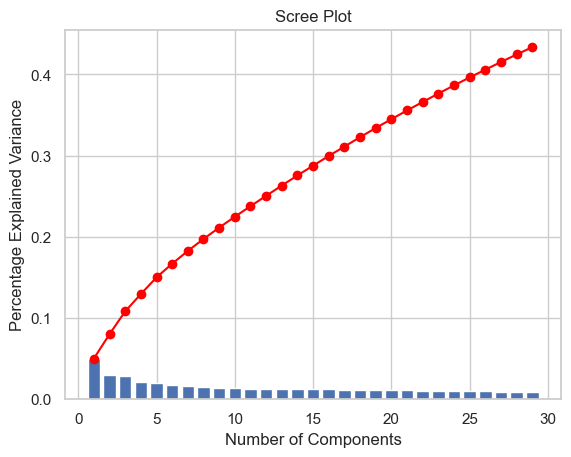

Number of Components that explains 85% of variance:
Coordinates (MCA equivalent of loadings):
            0         1         2         3         4         5         6   \
0    -0.564163  0.011208 -0.033785 -0.552359 -0.105804  0.083930  0.068097   
1     0.066558 -0.031007 -0.373098  0.115540 -0.022307  0.018399  0.150059   
2    -0.654414  0.016310 -0.127969 -0.539607 -0.212738  0.143670 -0.053882   
3     0.366686 -0.403912  0.200444 -0.033192 -0.314189 -0.282547 -0.483229   
4    -0.727298  0.065428 -0.188909 -0.549539 -0.191066  0.236671 -0.223636   
...        ...       ...       ...       ...       ...       ...       ...   
1454 -0.335701 -0.050969 -0.049450 -0.518550 -0.187435  0.115923 -0.225075   
1455  0.120518  0.078989 -0.701846  0.248445  0.079907  0.013931  0.025802   
1456 -0.167454 -0.314520  0.497547  0.387286  0.316589 -0.177064 -0.823836   
1457  0.212975 -0.090500 -0.261853  0.228861 -0.015761 -0.299654  0.411453   
1458  0.172023 -0.007845 -0.441194  0.152026  0.

In [58]:
#Do the MCA
MCA = MultipleCorrespondenceAnalysis()
MCA.explain(data.select_dtypes(include = ['object']))

Using MCA does not capture the whole variance of the data. For this reason, we will just encode the data and pass it to the model

In [59]:
print(data.select_dtypes(include = 'object').info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1459 non-null   object
 1   MSZoning       1459 non-null   object
 2   LotShape       1459 non-null   object
 3   LandContour    1459 non-null   object
 4   LotConfig      1459 non-null   object
 5   Neighborhood   1459 non-null   object
 6   Condition1     1459 non-null   object
 7   BldgType       1459 non-null   object
 8   HouseStyle     1459 non-null   object
 9   OverallQual    1459 non-null   object
 10  OverallCond    1459 non-null   object
 11  RoofStyle      1459 non-null   object
 12  Exterior1st    1459 non-null   object
 13  Exterior2nd    1459 non-null   object
 14  MasVnrType     1459 non-null   object
 15  ExterQual      1459 non-null   object
 16  ExterCond      1459 non-null   object
 17  Foundation     1459 non-null   object
 18  BsmtQual       1459 non-null

In [60]:
numeric = PCA.do(data.select_dtypes(exclude='object').drop(columns=['SalePrice']), n_components = 18, mode = 'train')
numericcol = data.select_dtypes(exclude='object').drop(columns = ['SalePrice']).columns
data = data.drop(columns = numericcol)
data = pd.concat([data,numeric],axis = 1)
data.info()

data = pd.concat([data, engineeredcatvar], axis = 1)
data = pd.get_dummies(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   object 
 1   MSZoning       1459 non-null   object 
 2   LotShape       1459 non-null   object 
 3   LandContour    1459 non-null   object 
 4   LotConfig      1459 non-null   object 
 5   Neighborhood   1459 non-null   object 
 6   Condition1     1459 non-null   object 
 7   BldgType       1459 non-null   object 
 8   HouseStyle     1459 non-null   object 
 9   OverallQual    1459 non-null   object 
 10  OverallCond    1459 non-null   object 
 11  RoofStyle      1459 non-null   object 
 12  Exterior1st    1459 non-null   object 
 13  Exterior2nd    1459 non-null   object 
 14  MasVnrType     1459 non-null   object 
 15  ExterQual      1459 non-null   object 
 16  ExterCond      1459 non-null   object 
 17  Foundation     1459 non-null   object 
 18  BsmtQual

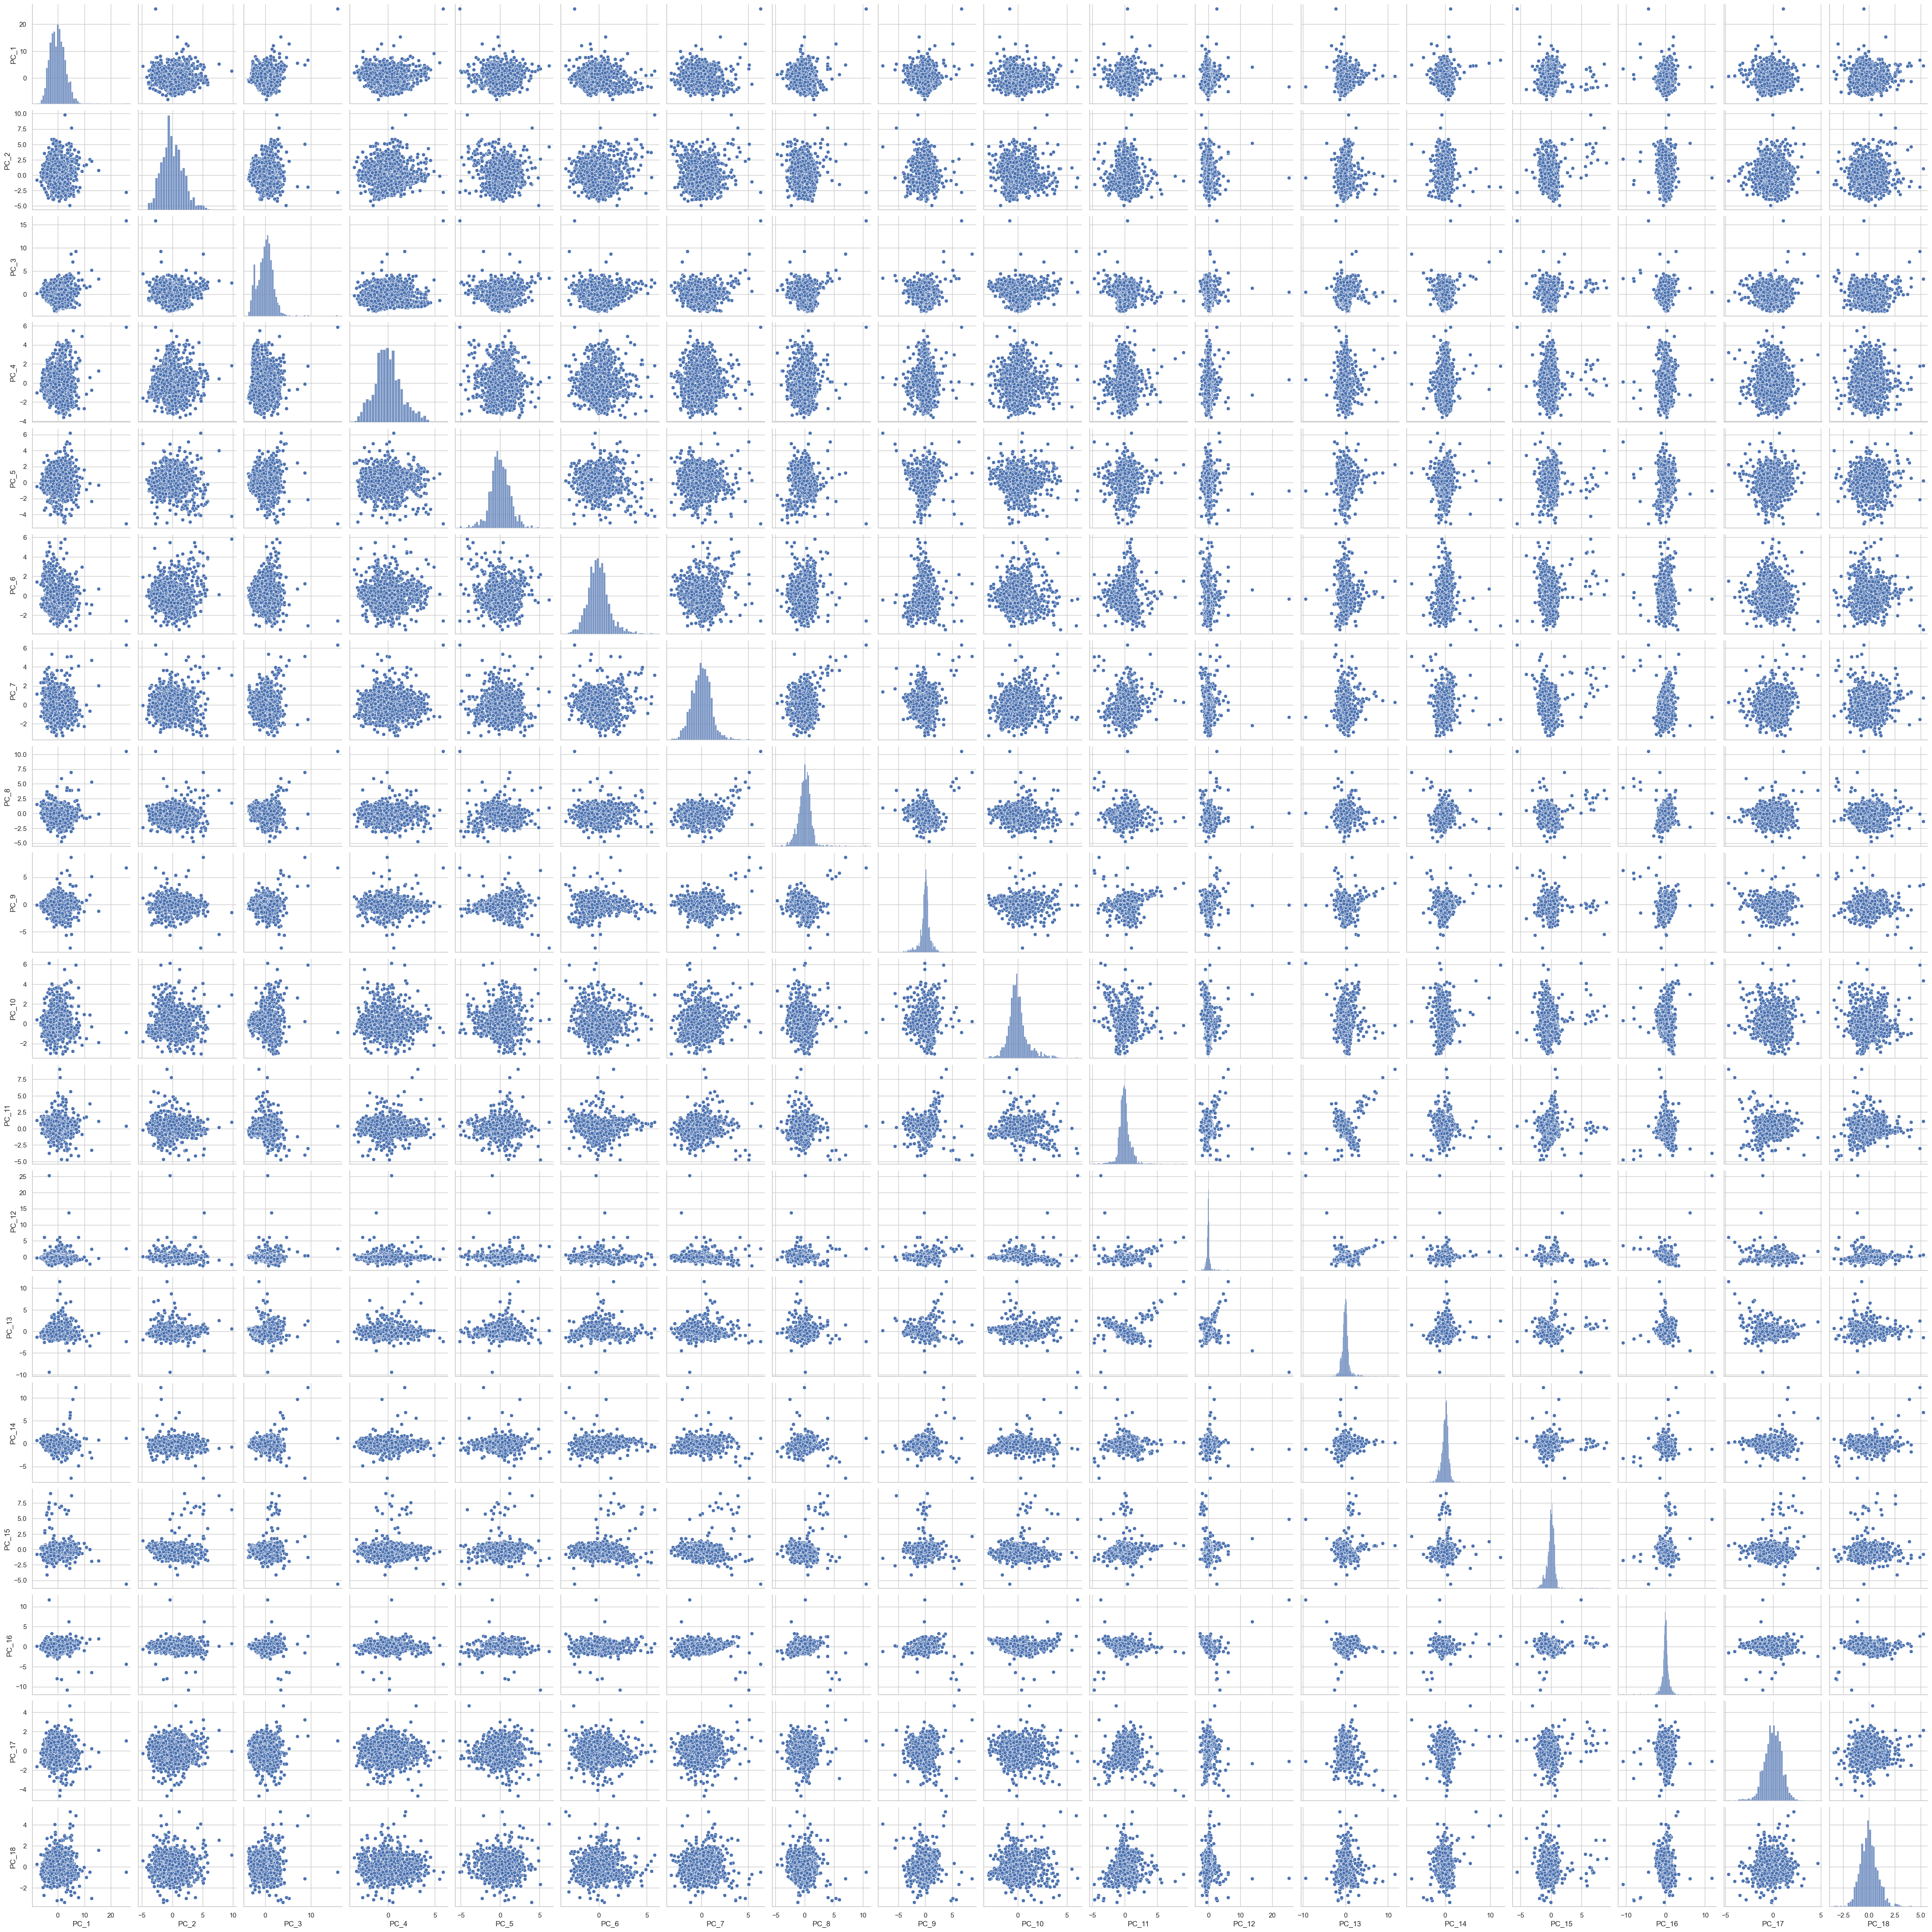

In [61]:
numericfeat = data[["PC_{}".format(i+1) for i in range(18)]] 
sns.pairplot(numericfeat)